In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [17]:
np.random.seed(50)

In [18]:
def true_function():
    t = np.linspace(0, 1, 100)
    s=[]
    for i in range(0,100):
        s.append(np.sin(2 * np.pi * t[i]))
    plt.plot(t, s, label='True function', color='black')

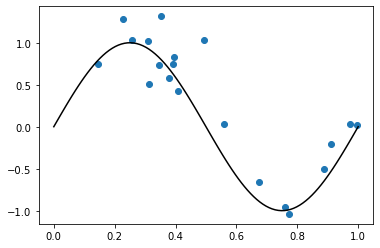

In [19]:
x_data = np.random.uniform(0,1,20)
N = np.random.normal(0, 1, 20)
y_data = np.sin(2 * np.pi * x_data) + N * 0.3
plt.scatter(x_data, y_data)
true_function()

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5, random_state=42)

x_train, y_train = zip(*sorted(zip(x_train, y_train)))
x_test, y_test = zip(*sorted(zip(x_test, y_test)))

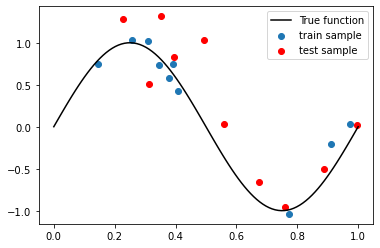

In [21]:
plt.scatter(x_train, y_train, label = 'train sample')
plt.scatter(x_test, y_test, c = 'r',label = 'test sample')
true_function()
plt.legend()

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [23]:
train_error = []
test_error = []

In [24]:
def cal_rmse(true, pred):
    return np.sqrt(mean_squared_error(true, pred))

Train RMSE :  0.611793890339779


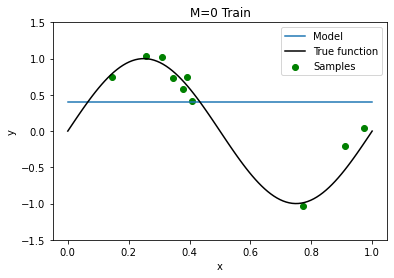

In [25]:
polynomial_features = PolynomialFeatures(0)
x_reshape = polynomial_features.fit_transform(np.asarray(x_train).reshape(-1,1))
model0 = LinearRegression()
model0.fit(x_reshape, y_train)

x = np.linspace(0, 1, 100)
x_plot = polynomial_features.fit_transform(x.reshape(-1, 1))
y_pred_plot = model0.predict(x_plot)

y_pred = model0.predict(x_reshape)
train_rmse = cal_rmse(y_train, y_pred)
print("Train RMSE : ", train_rmse)

plt.plot(x, y_pred_plot, label="Model")
plt.scatter(x_train, y_train, c='green', label='Samples')
true_function()
plt.title('M=0 Train')
plt.xlabel('x')
plt.ylim(-1.5 ,1.5)
plt.ylabel('y')
plt.legend()
plt.show()

Train RMSE :  0.3737588229316982


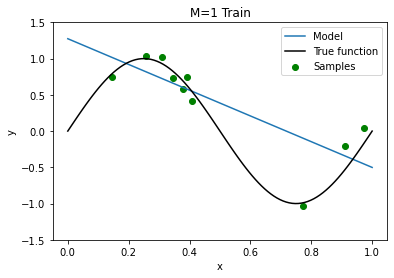

In [26]:
polynomial_features = PolynomialFeatures(1)
x_reshape= polynomial_features.fit_transform(np.asarray(x_train).reshape(-1,1))
model1 = LinearRegression()
model1.fit(x_reshape, y_train)

x = np.linspace(0, 1, 100)
x_plot = polynomial_features.fit_transform(x.reshape(-1, 1))
y_pred_plot = model1.predict(x_plot)

y_pred = model1.predict(x_reshape)
train_rmse = cal_rmse(y_train, y_pred)
print("Train RMSE : ", train_rmse)

plt.plot(x, y_pred_plot, label="Model")
plt.scatter(x_train, y_train, c='green', label='Samples')
true_function()
plt.title('M=1 Train')
plt.xlabel('x')
plt.ylim(-1.5 ,1.5)
plt.ylabel('y')
plt.legend()
plt.show()

Train RMSE :  0.11761886429363974


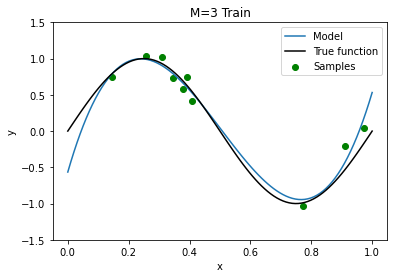

In [27]:
polynomial_features = PolynomialFeatures(3)
x_reshape= polynomial_features.fit_transform(np.asarray(x_train).reshape(-1,1))
model3 = LinearRegression()
model3.fit(x_reshape, y_train)

x = np.linspace(0, 1, 100)
x_plot = polynomial_features.fit_transform(x.reshape(-1, 1))
y_pred_plot = model3.predict(x_plot)

y_pred = model3.predict(x_reshape)
train_rmse = cal_rmse(y_train, y_pred)
print("Train RMSE : ", train_rmse)

plt.plot(x, y_pred_plot, label="Model")
plt.scatter(x_train, y_train, c='green', label='Samples')
true_function()
plt.title('M=3 Train')
plt.xlabel('x')
plt.ylim(-1.5 ,1.5)
plt.ylabel('y')
plt.legend()
plt.show()

RMSE :  3.078146059164671e-08


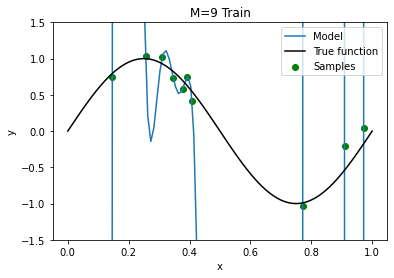

In [28]:
polynomial_features = PolynomialFeatures(9)
x_reshape= polynomial_features.fit_transform(np.asarray(x_train).reshape(-1,1))
model9 = LinearRegression()
model9.fit(x_reshape, y_train)

x = np.linspace(0, 1, 100)
x_plot = polynomial_features.fit_transform(x.reshape(-1, 1))
y_pred_plot = model9.predict(x_plot)

y_pred = model9.predict(x_reshape)
train_rmse = cal_rmse(y_train, y_pred)
print("RMSE : ", train_rmse)

plt.plot(x, y_pred_plot, label="Model")
plt.scatter(x_train, y_train, c='green', label='Samples')
plt.ylim(-1.5 ,1.5)
true_function()
plt.title('M=9 Train')
plt.xlabel('x')
plt.ylim(-1.5 ,1.5)
plt.ylabel('y')
plt.legend()
plt.show()

In [29]:
def gen_train_test_loss():
    train_error = []
    test_error = []
    for i in range(0, 10):
        polynomial_features = PolynomialFeatures(degree=i)
        x_train_poly = polynomial_features.fit_transform(np.asarray(x_train).reshape(-1, 1))
        x_test_poly = polynomial_features.fit_transform(np.asarray(x_test).reshape(-1, 1))

        poly_model = LinearRegression()
        poly_model.fit(x_train_poly, y_train)
        y_train_pred = poly_model.predict(x_train_poly)

        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        train_error.append(train_rmse)

        y_test_pred = poly_model.predict(x_test_poly)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_error.append(test_rmse)
    
    return train_error, test_error

train_error, test_error = gen_train_test_loss()

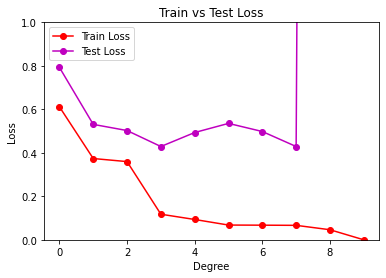

In [30]:
plt.plot(np.arange(0, 10, 1), train_error, color='r', label='Train Loss', marker='o')
plt.plot(np.arange(0, 10, 1), test_error, color='m', label='Test Loss', marker='o')
plt.title('Train vs Test Loss')
plt.xlabel('Degree')
plt.ylabel('Loss')
plt.ylim(0, 1)
plt.legend(loc='upper left')
plt.show()

In [31]:
weights_frame = pd.DataFrame(np.ndarray((10,5)))
weights_frame.columns = ['weights','M=0','M=1','M=3','M=9']
weights_frame['weights'] = ['W'+str(index) for index in range(10)]

weights_frame['M=0'] = model0.coef_.tolist() + [0]*(10-len(model0.coef_))
weights_frame['M=1'] = model1.coef_.tolist() + [0]*(10-len(model1.coef_))
weights_frame['M=3'] = model3.coef_.tolist() + [0]*(10-len(model3.coef_))
weights_frame['M=9'] = model9.coef_.tolist() + [0]*(10-len(model9.coef_))

with pd.option_context('display.float_format', '{:0.2f}'.format):
    print(weights_frame.replace(0,'-').head(10))

  weights M=0   M=1    M=3           M=9
0      W0   -     -      -             -
1      W1   - -1.78  14.58     721342.20
2      W2   -     - -39.96   -7789519.57
3      W3   -     -  26.48   46975184.23
4      W4   -     -      - -174593206.40
5      W5   -     -      -  414803807.75
6      W6   -     -      - -629618643.45
7      W7   -     -      -  588415338.42
8      W8   -     -      - -307277385.76
9      W9   -     -      -   68395524.44


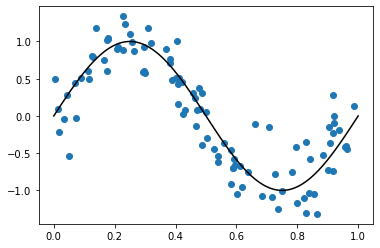

In [32]:
x_data_100 = np.random.uniform(0,1, 100)
N_100 = np.random.normal(0, 1, 100)
y_data_100 = np.sin(2 * np.pi * x_data_100) + N_100 * 0.3
plt.scatter(x_data_100, y_data_100)
true_function()

x_data_100, y_data_100 = zip(*sorted(zip(x_data_100, y_data_100)))

Train RMSE :  0.26906469044695674


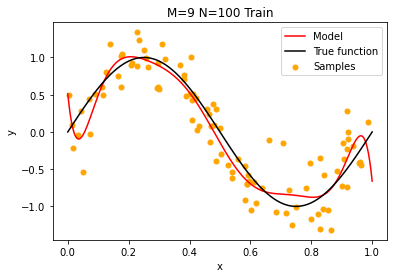

In [33]:
polynomial_features = PolynomialFeatures(degree=9)
x_train_poly_100 = polynomial_features.fit_transform(np.asarray(x_data_100).reshape(-1, 1))

model9 = LinearRegression()
model9.fit(x_train_poly_100, y_data_100)


x = np.linspace(0, 1, 250)
x_plot = polynomial_features.fit_transform(x.reshape(-1, 1))
y_pred_plot = model9.predict(x_plot)

y_pred = model9.predict(x_train_poly_100)
train_rmse = cal_rmse(y_data_100, y_pred)
print("Train RMSE : ", train_rmse)

plt.scatter(x_data_100, y_data_100, s=25, label='Samples', color='orange')
plt.plot(x, y_pred_plot, color='red', label='Model')
true_function()
plt.title('M=9 N=100 Train')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper right')
plt.show()

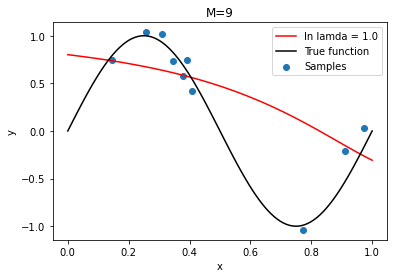

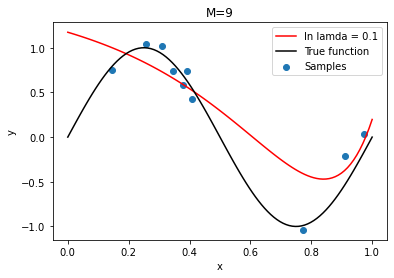

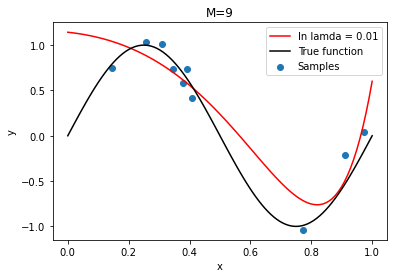

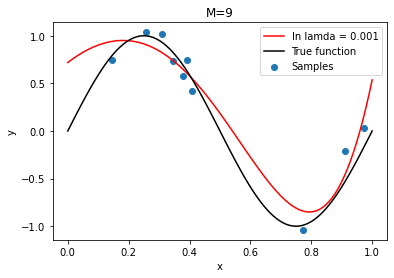

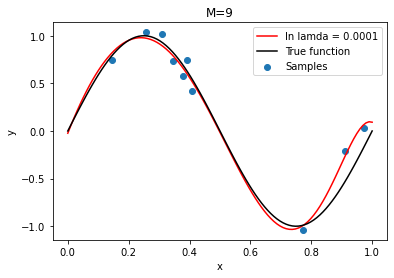

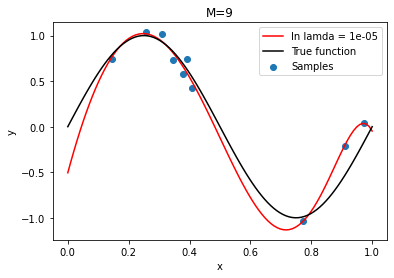

In [34]:
from sklearn.linear_model import Ridge


def plot_lam_graphs(deg, lambda_value):
    polynomial_features= PolynomialFeatures(degree = deg)
    x_reshape = polynomial_features.fit_transform(np.asarray(x_train).reshape(-1, 1))
    ridge_model = Ridge(alpha=lambda_value)
    ridge_model.fit(x_reshape, y_train)
    
    x = np.linspace(0, 1, 100)
    x_train_plot = polynomial_features.fit_transform(np.asarray(x).reshape(-1, 1))
    Y_pred = ridge_model.predict(x_train_plot)
    
    plt.plot(x, Y_pred, color='r',label="ln lamda = "+str(lambda_value))
    plt.scatter(x_train, y_train,label='Samples')
    true_function()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("M=9")
    plt.legend()
    plt.show()

lambda_values = np.array([1, 0.1, 0.01, 0.001, 0.0001, 0.00001])
for i in lambda_values:
    plot_lam_graphs(9, i)

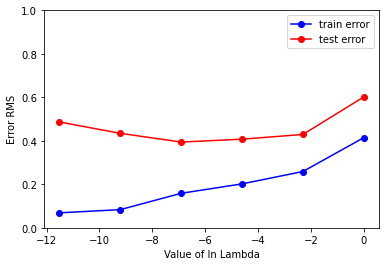

In [35]:
train_ridge_error = []
test_ridge_error  = []

def calc_ridge_error(Lambda):
    polynomial_features = PolynomialFeatures(9)
    x_train_reshape = polynomial_features.fit_transform(np.asarray(x_train).reshape(-1,1))
    x_test_reshape = polynomial_features.fit_transform(np.asarray(x_test).reshape(-1,1))
    ridge_model = Ridge(Lambda)
    ridge_model.fit(x_train_reshape, y_train)
    y_train_pred = ridge_model.predict(x_train_reshape)
    y_test_pred = ridge_model.predict(x_test_reshape)
    train_rmse = cal_rmse(y_train, y_train_pred)
    test_rmse = cal_rmse(y_test, y_test_pred)
    train_ridge_error.append(train_rmse)
    test_ridge_error.append(test_rmse)


lambda_param = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
plot_lambda = [ np.log(1), np.log(1/10), np.log(1/100), np.log(1/1000), np.log(1/10000), np.log(1/100000) ]
for i in lambda_param:
    calc_ridge_error(i)

plt.plot(plot_lambda, train_ridge_error, label = "train error", marker='o', color = 'blue')
plt.plot(plot_lambda, test_ridge_error, label = "test error", marker='o', color = 'red')
plt.ylim(0, 1)
plt.xlabel('Value of ln Lambda')
plt.ylabel('Error RMS')
plt.legend()

## BEST MODEL

In [36]:
print("Best lambda based on my analysis: ", lambda_param[test_ridge_error.index(min(test_ridge_error))])
print("Test error: ", min(test_ridge_error))

Best lambda based on my analysis:  0.001
Test error:  0.3942905088300612
